In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os

In [2]:
# print(os.listdir("../Software_Defect"))
data = pd.read_csv('../Software_Defect_2/soft_def_2.csv')

In [3]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80,44,11,31,29.0,66.0,192.0,126.0,17.0,True
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97,41,12,24,28.0,75.0,229.0,152.0,38.0,True
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457,71,48,49,64.0,397.0,1397.0,942.0,178.0,True


In [4]:
defect_true_false = data.groupby('defects')['b'].apply(lambda x: x.count())
print('False: ',defect_true_false[0])
print('True: ',defect_true_false[1])

False:  1032
True:  77


In [5]:
trace = go.Histogram(
    x = data.defects,
    opacity = 0.75,
    name = "Defects",
    marker = dict(color = 'green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Defects',
                   xaxis = dict(title = 'True - False'),
                   yaxis = dict(title = 'Frequency'),
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

In [6]:
data.corr()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.864412,0.675651,0.797250,0.923664,0.936543,-0.296245,0.658081,0.664524,0.643408,...,0.996509,0.578844,0.545353,0.735256,0.778592,0.946538,0.929810,0.908471,0.838829,0.267560
v(g),0.864412,1.000000,0.793403,0.868088,0.860168,0.861485,-0.291885,0.713193,0.482304,0.650220,...,0.866475,0.348092,0.420497,0.551903,0.738233,0.809916,0.867674,0.843714,0.991571,0.157536
ev(g),0.675651,0.793403,1.000000,0.803961,0.609772,0.654696,-0.192933,0.423402,0.346724,0.463018,...,0.689912,0.221198,0.201829,0.502333,0.566988,0.681435,0.626877,0.582859,0.796026,0.113434
iv(g),0.797250,0.868088,0.803961,1.000000,0.759703,0.805131,-0.205895,0.524967,0.453234,0.649320,...,0.804081,0.283683,0.338481,0.532545,0.650591,0.805264,0.775912,0.732776,0.839553,0.154809
n,0.923664,0.860168,0.609772,0.759703,1.000000,0.987273,-0.306340,0.792049,0.691376,0.774192,...,0.923509,0.475649,0.472907,0.635768,0.753052,0.907747,0.997363,0.995579,0.841358,0.221494
v,0.936543,0.861485,0.654696,0.805131,0.987273,1.000000,-0.260403,0.732551,0.662555,0.803554,...,0.937498,0.462928,0.468481,0.650032,0.729387,0.928634,0.990270,0.975661,0.835878,0.228580
l,-0.296245,-0.291885,-0.192933,-0.205895,-0.306340,-0.260403,1.000000,-0.429047,-0.216088,-0.121501,...,-0.296176,-0.182424,-0.144239,-0.234116,-0.517264,-0.298388,-0.304796,-0.305789,-0.298113,-0.004706
d,0.658081,0.713193,0.423402,0.524967,0.792049,0.732551,-0.429047,1.000000,0.334209,0.713185,...,0.656953,0.316447,0.346681,0.423831,0.809138,0.577429,0.793302,0.784213,0.695554,0.094567
i,0.664524,0.482304,0.346724,0.453234,0.691376,0.662555,-0.216088,0.334209,1.000000,0.301308,...,0.666170,0.415757,0.322100,0.475057,0.438585,0.755207,0.673538,0.709036,0.483932,0.213632
e,0.643408,0.650220,0.463018,0.649320,0.774192,0.803554,-0.121501,0.713185,0.301308,1.000000,...,0.648435,0.230086,0.278135,0.424825,0.533090,0.607236,0.792130,0.744917,0.600819,0.117675


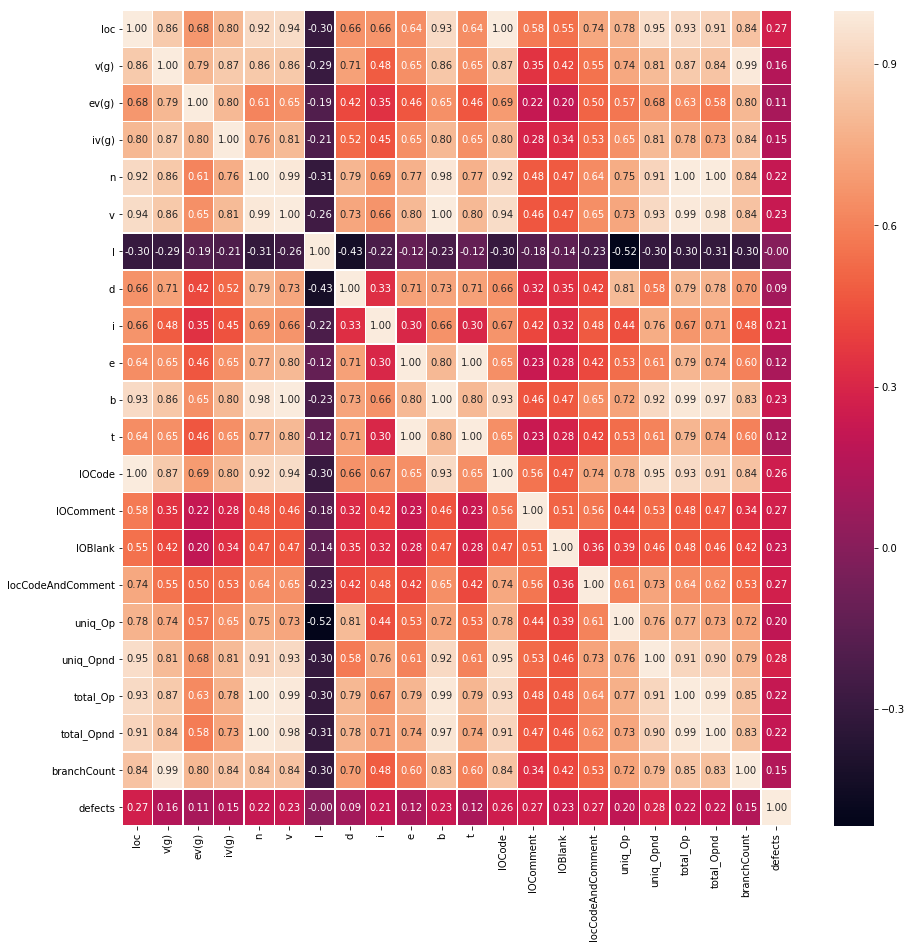

In [7]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [8]:
trace = go.Scatter(
    x = data.v,
    y = data.b,
    mode = "markers",
    name = "Volume - Bug",
    marker = dict(color = 'darkblue'),
    text = "Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title = 'Volume - Bug',
              xaxis = dict(title = 'Volume', ticklen = 5),
              yaxis = dict(title = 'Bug' , ticklen = 5),
             )
fig = dict(data = scatter_data, layout = scatter_layout)
iplot(fig)

In [9]:
data.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [10]:
trace1 = go.Box(
    x = data.uniq_Op,
    name = 'Unique Operators',
    marker = dict(color = 'blue')
    )
box_data = [trace1]
iplot(box_data)

In [11]:
def evaluation_control(data):    
    evaluation = (data.n < 300) & (data.v < 1000 ) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in data.complexityEvaluation]

In [12]:
evaluation_control(data)
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,Succesful
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,True,Succesful
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,44,11,31,29.0,66.0,192.0,126.0,17.0,True,Redesign
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,41,12,24,28.0,75.0,229.0,152.0,38.0,True,Redesign
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,71,48,49,64.0,397.0,1397.0,942.0,178.0,True,Redesign
5,107.0,25.0,7.0,14.0,619.0,4282.78,0.02,52.91,80.95,226588.75,...,32,4,39,35.0,86.0,359.0,260.0,40.0,True,Redesign
6,74.0,11.0,1.0,8.0,294.0,1917.93,0.03,28.77,66.66,55178.46,...,71,14,49,29.0,63.0,169.0,125.0,21.0,True,Redesign
7,602.0,136.0,123.0,123.0,2785.0,25942.69,0.01,105.26,246.47,2730637.23,...,40,2,225,99.0,538.0,1641.0,1144.0,236.0,True,Redesign
8,29.0,2.0,1.0,2.0,140.0,718.10,0.10,9.93,72.35,7127.80,...,3,1,8,8.0,27.0,73.0,67.0,3.0,True,Succesful
9,36.0,3.0,1.0,1.0,254.0,1447.91,0.04,23.72,61.05,34338.99,...,2,2,10,15.0,37.0,137.0,117.0,5.0,True,Redesign


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 23 columns):
loc                     1109 non-null float64
v(g)                    1109 non-null float64
ev(g)                   1109 non-null float64
iv(g)                   1109 non-null float64
n                       1109 non-null float64
v                       1109 non-null float64
l                       1109 non-null float64
d                       1109 non-null float64
i                       1109 non-null float64
e                       1109 non-null float64
b                       1109 non-null float64
t                       1109 non-null float64
lOCode                  1109 non-null int64
lOComment               1109 non-null int64
lOBlank                 1109 non-null int64
locCodeAndComment       1109 non-null int64
uniq_Op                 1109 non-null float64
uniq_Opnd               1109 non-null float64
total_Op                1109 non-null float64
total_Opnd              110

In [14]:
data.groupby("complexityEvaluation").size()

complexityEvaluation
Redesign     200
Succesful    909
dtype: int64

In [15]:
# Histogram
trace = go.Histogram(
    x = data.complexityEvaluation,
    opacity = 0.75,
    name = 'Complexity Evaluation',
    marker = dict(color = 'darkorange')
)
hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Complexity Evaluation',
                   xaxis = dict(title = 'Succesful - Redesign'),
                   yaxis = dict(title = 'Frequency')
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

In [16]:
from sklearn import preprocessing

scale_v = data[['v']]
scale_b = data[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

data['v_ScaledUp'] = pd.DataFrame(v_scaled)
data['b_ScaledUp'] = pd.DataFrame(b_scaled)

data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,1.2,1.2,1.2,1.2,1.4,False,Succesful,0.000050,0.150289
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1.0,1.0,1.0,1.0,1.0,True,Succesful,0.000039,0.115607
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,31,29.0,66.0,192.0,126.0,17.0,True,Redesign,0.080532,0.080925
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,24,28.0,75.0,229.0,152.0,38.0,True,Redesign,0.098200,0.098266
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,49,64.0,397.0,1397.0,942.0,178.0,True,Redesign,0.797794,0.797688
5,107.0,25.0,7.0,14.0,619.0,4282.78,0.02,52.91,80.95,226588.75,...,39,35.0,86.0,359.0,260.0,40.0,True,Redesign,0.165086,0.165318
6,74.0,11.0,1.0,8.0,294.0,1917.93,0.03,28.77,66.66,55178.46,...,49,29.0,63.0,169.0,125.0,21.0,True,Redesign,0.073929,0.073988
7,602.0,136.0,123.0,123.0,2785.0,25942.69,0.01,105.26,246.47,2730637.23,...,225,99.0,538.0,1641.0,1144.0,236.0,True,Redesign,1.000000,1.000000
8,29.0,2.0,1.0,2.0,140.0,718.10,0.10,9.93,72.35,7127.80,...,8,8.0,27.0,73.0,67.0,3.0,True,Succesful,0.027680,0.027746
9,36.0,3.0,1.0,1.0,254.0,1447.91,0.04,23.72,61.05,34338.99,...,10,15.0,37.0,137.0,117.0,5.0,True,Redesign,0.055812,0.055491


In [17]:
scaled_data = pd.concat([data.v , data.b , data.v_ScaledUp , data.b_ScaledUp], axis=1)
scaled_data

,v,b,v_ScaledUp,b_ScaledUp
0,1.30,1.30,0.000050,0.150289
1,1.00,1.00,0.000039,0.115607
2,2089.21,0.70,0.080532,0.080925
3,2547.56,0.85,0.098200,0.098266
4,20696.93,6.90,0.797794,0.797688
5,4282.78,1.43,0.165086,0.165318
6,1917.93,0.64,0.073929,0.073988
7,25942.69,8.65,1.000000,1.000000
8,718.10,0.24,0.027680,0.027746
9,1447.91,0.48,0.055812,0.055491


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 25 columns):
loc                     1109 non-null float64
v(g)                    1109 non-null float64
ev(g)                   1109 non-null float64
iv(g)                   1109 non-null float64
n                       1109 non-null float64
v                       1109 non-null float64
l                       1109 non-null float64
d                       1109 non-null float64
i                       1109 non-null float64
e                       1109 non-null float64
b                       1109 non-null float64
t                       1109 non-null float64
lOCode                  1109 non-null int64
lOComment               1109 non-null int64
lOBlank                 1109 non-null int64
locCodeAndComment       1109 non-null int64
uniq_Op                 1109 non-null float64
uniq_Opnd               1109 non-null float64
total_Op                1109 non-null float64
total_Opnd              110

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

X = data.iloc[:, :-10].values  #Select related attribute values for selection
Y = data.complexityEvaluation.values   #Select classification attribute values

In [20]:
Y

array(['Succesful', 'Succesful', 'Redesign', ..., 'Succesful', 'Succesful',
       'Redesign'], dtype=object)

In [21]:
#Parsing selection and verification datasets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [22]:
from sklearn import tree

In [23]:
model = tree.DecisionTreeClassifier()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Decision Tree Algorithm
             precision    recall  f1-score   support

   Redesign       1.00      0.97      0.99        37
  Succesful       0.99      1.00      1.00       185

avg / total       1.00      1.00      1.00       222

[[ 36   1]
 [  0 185]]
ACC:  0.995495495495
